In [5]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # for 3d visualization only
import numpy as np
import cv2
import time

Loading the Images 

In [2]:
# loading all the images here
img1 = cv2.imread('./Images/testPattern.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('./Images/salt_noise.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img3 = cv2.imread('./Images/pepper_noise.png')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

img4 = cv2.imread('./Images/salt_and_pepper_noise.png')
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

img5 = cv2.imread('./Images/blurry_spiral.png')
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

img6 = cv2.imread('./Images/coins.PNG')
img6 = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)

img7 = cv2.imread('./Images/tiger.jfif')
img7 = cv2.cvtColor(img7, cv2.COLOR_BGR2RGB)

img8 = cv2.imread('./Images/test.png')
img8 = cv2.cvtColor(img8, cv2.COLOR_BGR2RGB)


### Function to visualize a kernel

In [3]:
def visualizeKernel(matrix):
    rows, cols = matrix.shape
    
    x = np.arange(0, cols, 1)
    y = np.arange(0, rows, 1)
    x, y = np.meshgrid(x, y)
    z = matrix.flatten()

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z.reshape(matrix.shape), cmap='viridis')

    ax.set_xlabel('i')
    ax.set_ylabel('j')
    ax.set_zlabel('kernel_value')
    
    plt.title('Kernel plot')
    plt.show()


## 1.) Convolution
### 1.1 Implementing conv2D() function

In [4]:
def conv2D(img, kernel):
    m = kernel.shape[0]
    # checking if the kernel size is odd
    if m%2==0:
        print('Kernel Size should be odd!')
        return img
    rows,cols = img.shape[0:2]
    # applying padding to the image for convolution
    pad_size = int(m/2)
    new_img = cv2.copyMakeBorder(img, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)
    
    # applying convolution
    for i in range(rows):
        for j in range(cols):
            sub_img = new_img[i:i+2*pad_size+1,j:j+2*pad_size+1,0]
            val = int(np.sum(np.multiply(sub_img,kernel)))
            new_img[i+pad_size,j+pad_size] = val
            new_img[i+pad_size,j+pad_size,1] = val
            new_img[i+pad_size,j+pad_size,2] = val
            
    
    ret_img = new_img[pad_size:pad_size+rows,pad_size:pad_size+cols,:]
    return ret_img
 

Function to perform  2d Convolution on a numpy matrix

In [9]:
def convolve_matrix(img, kernel):
    kernel_size = kernel.shape[0]
    pad_size = kernel_size//2
    padded_img = np.pad(img,pad_width=[(pad_size,pad_size),(pad_size,pad_size)])
    rows, cols = padded_img.shape
    
    filtered_img = np.zeros((img.shape[0],img.shape[1]))
    for i in range(pad_size,rows-pad_size):
        for j in range(pad_size,cols-pad_size):
            sub_mat = padded_img[i-pad_size:i+pad_size+1,j-pad_size:j+pad_size+1]
            val = np.sum(np.multiply(sub_mat,kernel.T))
            filtered_img[i-pad_size,j-pad_size] = val
            
    return filtered_img


### 1.2 Mean Filter

In [6]:
def meanFilter(img,kernel_size):
    kernel = np.ones((kernel_size,kernel_size))/(kernel_size*kernel_size)
    mean_filtered_image = conv2D(img,kernel)
    return mean_filtered_image

### 1.4 Gaussian Filter

In [7]:
def gaussianFilter(img,size,sigma):
    # creating a normalized gaussian kernel of the given size with some pre-defined variance 
    kernel = np.fromfunction(lambda x, y: (1/ (2*np.pi*sigma**2)) * np.exp(- ((x - (size-1)/2)**2 + (y - (size-1)/2)**2) / (2*sigma**2)), (size, size))
    kernel = kernel/np.sum(kernel)
    
    # uncomment below line to visualize gaussian kernel
#     visualizeKernel(kernel)
    ret_img = conv2D(img,kernel)
    return ret_img


Mean Filtered Image for kernel size =  5


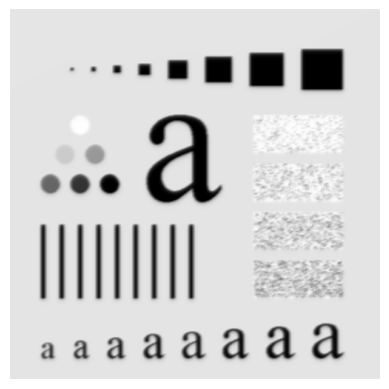

In [8]:
k_size = 5
mean_filtered_img1 = meanFilter(img1,k_size)

print('Mean Filtered Image for kernel size = ',k_size)
plt.imshow(mean_filtered_img1)
plt.axis('off')  # Turn off axis for better visualization
plt.show()


Gaussian Filtered Image for kernel size =  5


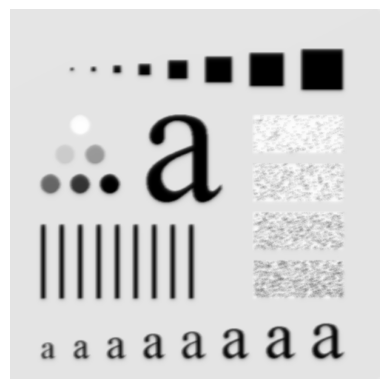

In [9]:
# performing gaussian filtering on the img1

# keep the kernel size odd
k_size = 5
sigma = 15
gauss_filtered_img1 = gaussianFilter(img1,k_size,sigma)

print('Gaussian Filtered Image for kernel size = ',k_size)
plt.imshow(gauss_filtered_img1)
plt.axis('off')  # Turn off axis for better visualization
plt.show()


### 1.3 Comment on how the time taken for the operation changes with kernel size `k` , and image dimensions 

We can analyse the effect of kernel size and image dimensions on the run-time of the algorithm by calculating the time-complexity of the convolution function. Since there is a direct loop on the dimensions of the image $N$ and $M$, the time taken is directly proportional to both. Therefore, 

$$
time\ \propto\ N\cdot M
$$

For each pixel in the input image, the algorithm slides the kernel over a region of the image to perform element-wise multiplication and summation. This operation is performed for each pixel, and the total number of operations is proportional to the number of pixels in the image. Therefore, sliding the kernel has a time complexity of $O(N \times M \times K^2)$, where K is the size of the kernel.

Overall, the time complexity of the given convolution algorithm is $O(N \times M \times K^2)$, where:

- N is the height of the input image.
- M is the width of the input image.
- K is the size of the kernel (assuming the kernel is square).

Therefore in conclusion :-
- With respect to height $N$ of the image, the time is directly proportional
- With respect to width $M$ of the image, the time is directly proportional
- With respect to kernel size $K$, the time is proportional to $K^2$



### Visualizing the effect of large sigma on the kernel and thus the image


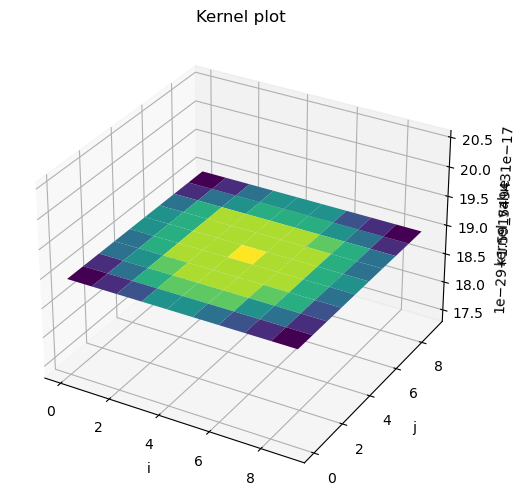

In [10]:
# visualizing the effect of large sigma on the kernel and thus the image
size = 10
sigma = 100000000
kernel = np.fromfunction(lambda x, y: (1/ (2*np.pi*sigma**2)) * np.exp(- ((x - (size-1)/2)**2 + (y - (size-1)/2)**2) / (2*sigma**2)), (size, size))
visualizeKernel(kernel)

### Comment on how the time taken for the operation changes with kernel size k , and image dimensions

We can see by visulaizing the kernel for large $\sigma$ that as $\sigma \to \infty$ the kernel becomes flat. This is very similar to the mean filter and for sufficiently large $\sigma$, can be approximated as a mean filter (if normalized). Therefore, as $\sigma \to \infty$, the gaussian filter tends to a simple mean filter.

---

## 2.) Need For Speed
### 2.1 speedyMeanFilter() implementation

In [11]:
def speedyMeanFilter(img,kernel_size):
    if kernel_size%2==0:
        print('Kernel Size should be odd!')
        return img
    
    rows, cols = img.shape[0:2]
    pad_size = int(kernel_size/2)
    new_img = cv2.copyMakeBorder(img, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)
    ar = np.array(new_img[:,:,0])
    pref_sum = np.zeros((ar.shape[0],ar.shape[1]))
    
    for i in range(ar.shape[0]):
        for j in range(ar.shape[1]):
            if(i==0 and j==0):
                pref_sum[i,j]=ar[i,j]
            elif (i==0):
                pref_sum[i,j]=ar[i,j]+pref_sum[i,j-1]
            elif (j==0):
                pref_sum[i,j]=ar[i,j]+pref_sum[i-1,j]
            else:
                pref_sum[i,j]=ar[i,j]+pref_sum[i-1,j]+pref_sum[i,j-1]-pref_sum[i-1,j-1]
                
    for i in range(rows):
        for j in range(cols):
            x = i+pad_size
            y = j+pad_size
            val1 = pref_sum[x+pad_size,y+pad_size]
            val2 = 0 if x-pad_size-1<0 else pref_sum[x-pad_size-1,y+pad_size]
            val3 = 0 if y-pad_size-1<0 else pref_sum[x+pad_size,y-pad_size-1]
            val4 = 0 if x-pad_size-1<0 or y-pad_size-1<0 else pref_sum[x-pad_size-1,y-pad_size-1]
            
            val = (val1-val2-val3+val4)/((kernel_size)*(kernel_size))

            new_img[i,j,0]=val
            new_img[i,j,1]=val
            new_img[i,j,2]=val
            
    ret_img = new_img[pad_size:pad_size+rows,pad_size:pad_size+cols,:]
    return ret_img


            
  
    

SpeedyMeanFiltered Image for kernel size =  5


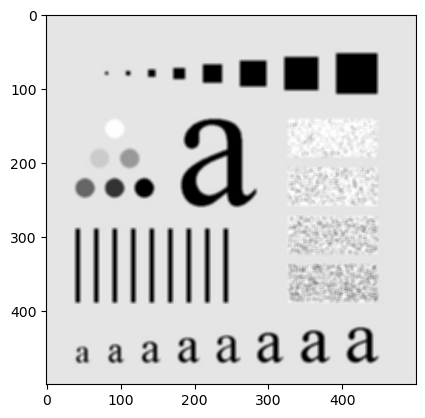

In [12]:
# use of speedy mean filter to blur img1
k_size = 5
ret_img = speedyMeanFilter(img1,k_size)
print('SpeedyMeanFiltered Image for kernel size = ',k_size)
plt.imshow(ret_img)
plt.show()

### 2.2 Plotting the run-time vs kernel-size for both implementations of mean filter

In [13]:
# plotting time vs k for speedyMean and Mean functions
K = 51

k_values = []
time_mean = []
time_speedy = []

for k in range(3,K,2):
    t1 = time.time()
    ret = meanFilter(img1,k)
    t2 = time.time()
    time_mean.append(t2-t1)
    
    t1 = time.time()
    ret = speedyMeanFilter(img1,k)
    t2 = time.time()
    time_speedy.append(t2-t1)
    
    k_values.append(k)



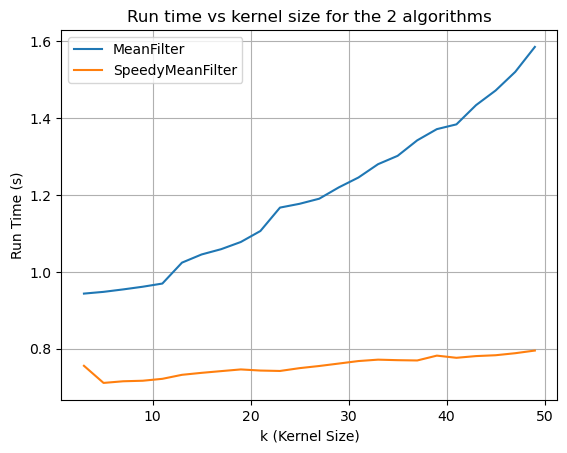

In [14]:
    
plt.plot(k_values,time_mean ,label='MeanFilter')
plt.plot(k_values, time_speedy,label='SpeedyMeanFilter')

plt.xlabel('k (Kernel Size)')
plt.ylabel('Run Time (s)')
plt.title('Run time vs kernel size for the 2 algorithms')

plt.legend()
plt.grid(True)
plt.show()


### Observations and analysis
- We can observe from the above graph that the run-time of the *Speedy Mean filter* is asymptotically independent of kernel size $k$ and thus gives a much better performance for large kernel mean filtering.

- The algorithm of *Speedy Mean Filter* makes use of prefix sum of a matrix to calculate sum of elements of a submatrix in $O(1)$ time complexity, thereby eliminating the dependence of kernel size.

- Note that since we are padding the image with $pad-size$ which is directly dependent on kernel-size, we are still dependent on kernel size, just not asymptotically.

---
## 3.) Salt and Pepper

### Defining verious filters to remove the salt, pepper and salt+pepper noise

- To remove salt noise, we use the min filter
- To remove the pepper noise, we use the max filter
- To remove the salt and pepper noise, we use the median filter

In [15]:
# function to remove salt/pepper noise from image
def minFilter(img, kernel_size):
    rows,cols = img.shape[0:2]
    pad_size = int(kernel_size/2)
    new_img = cv2.copyMakeBorder(img, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_CONSTANT,value=255)
    filtered_img = np.zeros_like(img)
    
    for i in range(rows):
        for j in range(cols):
            sub_img = new_img[i:i+kernel_size,j:j+kernel_size,0]
            filtered_img[i,j] = (np.min(sub_img))
    
    return filtered_img


def maxFilter(img, kernel_size):
    rows,cols = img.shape[0:2]
    pad_size = int(kernel_size/2)
    new_img = cv2.copyMakeBorder(img, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_CONSTANT,value=0)
    filtered_img = np.zeros_like(img)
    
    for i in range(rows):
        for j in range(cols):
            sub_img = new_img[i:i+kernel_size,j:j+kernel_size,0]
            filtered_img[i,j] = (np.max(sub_img))
    
    return filtered_img

def medianFilter(img, kernel_size):
    rows,cols = img.shape[0:2]
    pad_size = int(kernel_size/2)
    new_img = cv2.copyMakeBorder(img, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_CONSTANT,value=255)
    filtered_img = np.zeros_like(img)
    
    for i in range(rows):
        for j in range(cols):
            sub_img = new_img[i:i+kernel_size,j:j+kernel_size,0]
            filtered_img[i,j] = (np.median(sub_img))
    
    return filtered_img



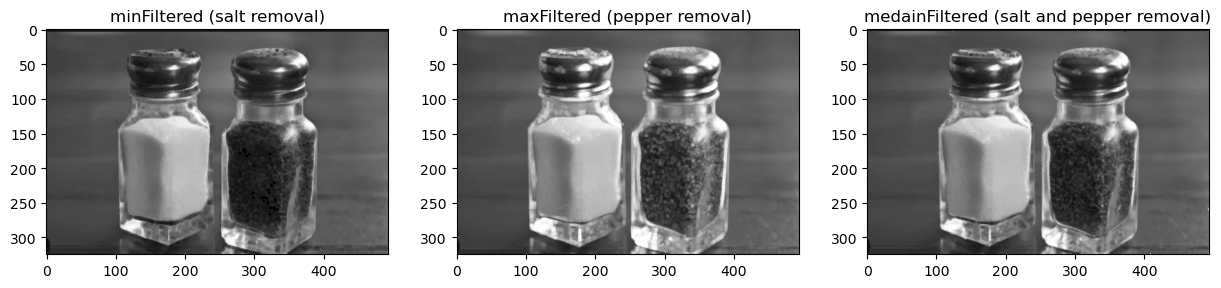

In [16]:
kernel_size = 3
ret1 = minFilter(img3,kernel_size)
ret2 = maxFilter(img2,kernel_size)
ret3 = medianFilter(img4,kernel_size)


plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.imshow(ret1,cmap='gray')
plt.title('minFiltered (salt removal)')
plt.subplot(1,3,2)
plt.imshow(ret2,cmap='gray')
plt.title('maxFiltered (pepper removal)')
plt.subplot(1,3,3)
plt.imshow(ret3,cmap='gray')
plt.title('medainFiltered (salt and pepper removal)')
plt.show()




## 4.) Blurry? Don’t Worry

In [17]:
# functions to sharpen the blurred Image
def unsharpMask(img,A,k):
    laplacian = np.array([[0,-1,0],
                          [-1,4,-1],
                          [0,-1,0]])
    gradient = convolve_matrix(img,laplacian)
    sharpened_img = img+A*gradient
    return sharpened_img
    

# high-boost filtering
def sharpen(img,A,k):
    image = img.copy()
    blurred_img = meanFilter(image,k)
    diff = image[:,:,0]-blurred_img[:,:,0]
    ret = np.clip(image[:,:,0]+np.clip(A*diff,0,255),0,255)
    return ret

def sharpenGaussian(img,A,k):
    image = img.copy()
    blurred_img = gaussianFilter(image,k,k/5)
    diff = image[:,:,0]-blurred_img[:,:,0]
    ret = np.clip(image[:,:,0]+np.clip(A*diff,0,255),0,255)
    return ret


Sharpening of Images through HBF with blurring through mean filter


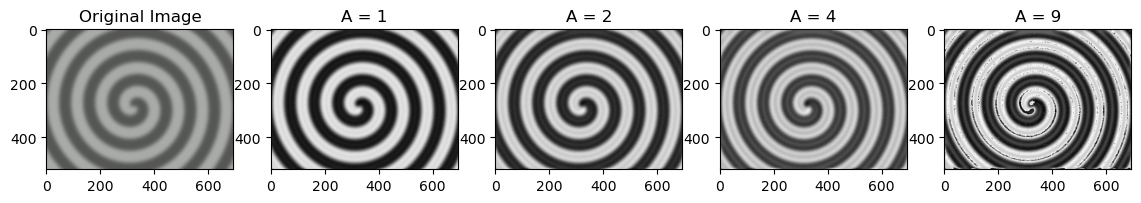

In [18]:
# sharpening images using HBF with mean blurring

k = 21 # kernel size for all iamges
ret1 = sharpen(img5,1,k)
ret2 = sharpen(img5,2,k)
ret3 = sharpen(img5,4,k)
ret4 = sharpen(img5,9,k)


print('Sharpening of Images through HBF with blurring through mean filter')
plt.figure(figsize=(14, 8))
plt.subplot(1, 5, 1)
plt.imshow(img5)
plt.title('Original Image')

plt.subplot(1, 5, 2)
plt.imshow(ret1,cmap='gray')
plt.title('A = 1')

plt.subplot(1, 5, 3)
plt.imshow(ret2,cmap='gray')
plt.title('A = 2')

plt.subplot(1, 5, 4)
plt.imshow(ret3,cmap='gray')
plt.title('A = 4')

plt.subplot(1, 5, 5)
plt.imshow(ret4,cmap='gray')
plt.title('A = 9')

plt.show()

### Observations

- We can see that as the value of Amplifying factor increases, the sharpness of the output image also increases.

- Also it is obvious that the sharpness also increases with increase in amount of blurring done (kernel size) in 1st step of the HBF function.
- After a certain value of A, unnecessary sharpening starts occuring, causing over-sharpened artifacts in the image (as seen in the last image with A=9)

Sharpening of Images through HBF with blurring through Gaussian filter


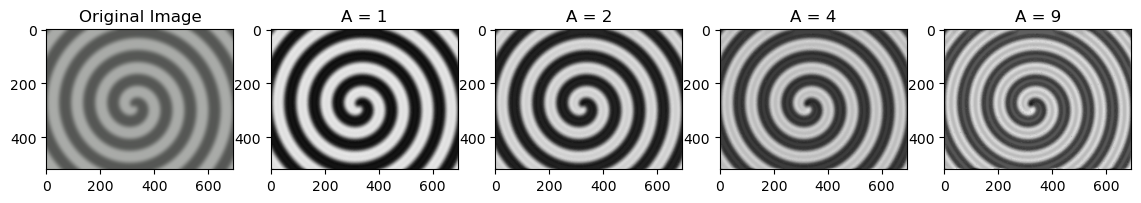

In [19]:
# sharpening images using HBF with Gaussian blurring

k = 21 # kernel size for all iamges
ret1 = sharpenGaussian(img5,1,k)
ret2 = sharpenGaussian(img5,2,k)
ret3 = sharpenGaussian(img5,4,k)
ret4 = sharpenGaussian(img5,9,k)


print('Sharpening of Images through HBF with blurring through Gaussian filter')
plt.figure(figsize=(14, 8))
plt.subplot(1, 5, 1)
plt.imshow(img5)
plt.title('Original Image')

plt.subplot(1, 5, 2)
plt.imshow(ret1,cmap='gray')
plt.title('A = 1')

plt.subplot(1, 5, 3)
plt.imshow(ret2,cmap='gray')
plt.title('A = 2')

plt.subplot(1, 5, 4)
plt.imshow(ret3,cmap='gray')
plt.title('A = 4')

plt.subplot(1, 5, 5)
plt.imshow(ret4,cmap='gray')
plt.title('A = 9')

plt.show()

### Observations

- Similar to the mean blurring HBF, the gaussian blurring HBF also causes sharpness to increase with increase in amplyfring factor as well as the kernel size (blur amount)
- However, since the blurring is radially symmetrical about every pixel, the presence of over-sharpened artifacts is less often seen in gaussian-blurring HBF, thereby providing better results.
- This is the direct result of the non-rippling nature of the fourier transform of the gaussian filter as compared to the mean filter which has sinc-type response.

## 5.) Counting Coins

In [2]:
def getPrewitt(img):
    prewitt_x = np.array([[-1,0,1],
                          [-1,0,1],
                          [-1,0,1]])
    prewitt_y = np.array([[1,1,1],
                          [0,0,0],
                          [-1,-1,-1]])
    x_gradient = convolve_matrix(img,prewitt_x)
    y_gradient = convolve_matrix(img,prewitt_y)
    return x_gradient, y_gradient

def getSobel(img):
    sobel_x = np.array([[-1,0,1],
                        [-2,0,2],
                        [-1,0,1]])
    sobel_y = np.array([[1,2,1],
                        [0,0,0],
                        [-1,-2,-1]])

    x_gradient = convolve_matrix(img,sobel_x)
    y_gradient = convolve_matrix(img,sobel_y)
    return x_gradient, y_gradient

def getLaplacian(img):
    laplacian = np.array([[0,-1,0],
                          [-1,4,-1],
                          [0,-1,0]])

    gradient = convolve_matrix(img,laplacian)
    return gradient

***Loading the image***

In [7]:
image_path = './Images/coins.PNG'
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
coins = np.array(gray_image)


### 5.1 Prewitt Filtering

Gradients for Prewitt filter


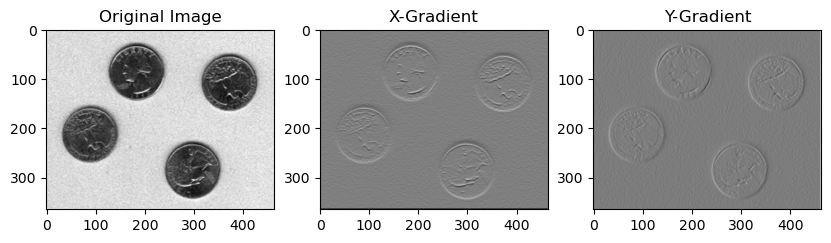

In [22]:
x_gradient,y_gradient = getPrewitt(coins)

# plotting the original image, x gradient and y gradient
plt.figure(figsize=(10,5))
print('Gradients for Prewitt filter')
plt.subplot(1,3,1)
plt.imshow(coins,cmap='gray')
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(x_gradient,cmap='gray')
plt.title('X-Gradient')
plt.subplot(1,3,3)
plt.imshow(y_gradient,cmap='gray')
plt.title('Y-Gradient')

plt.show()


### Results
- We can clearly see that the x-gradient highlights high frequency (high gradients) present along the x-axis (horizontal direction or vertical lines)
- Similarly, the y-gradient highlights high frequency (high gradients) present along the y-axis (vertical direction or horizontal lines)

### 5.2) Sobel Filtering 

Gradients for Sobel filter


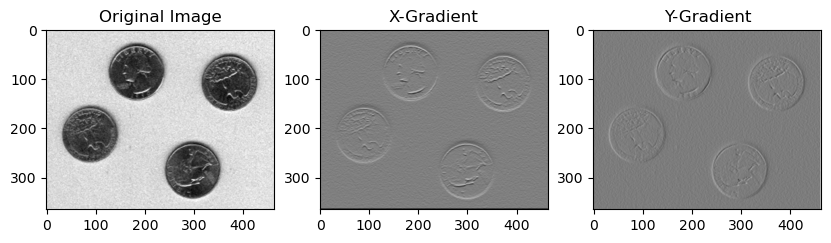

In [10]:
x_gradient,y_gradient = getSobel(coins)

# plotting the original image, x gradient and y gradient
plt.figure(figsize=(10,5))
print('Gradients for Sobel filter')
plt.subplot(1,3,1)
plt.imshow(coins,cmap='gray')
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(x_gradient,cmap='gray')
plt.title('X-Gradient')
plt.subplot(1,3,3)
plt.imshow(y_gradient,cmap='gray')
plt.title('Y-Gradient')

plt.show()


### Results
- We can clearly see that the x-gradient highlights high frequency (high gradients) present along the x-axis (horizontal direction or vertical lines)
- Similarly, the y-gradient highlights high frequency (high gradients) present along the y-axis (vertical direction or horizontal lines)

### 5.3) Laplacian Filtering

Gradients for Laplacian Filter


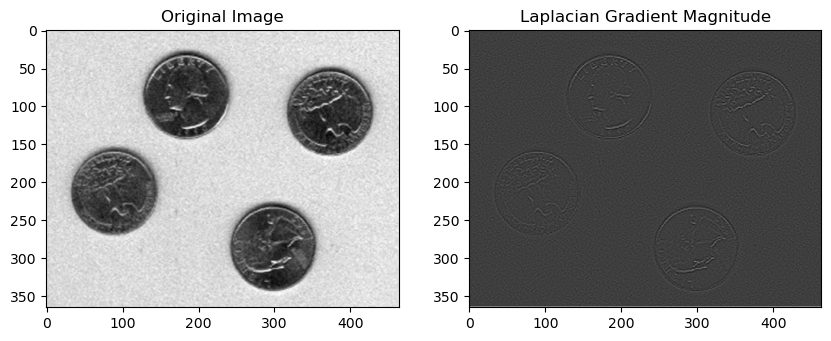

In [24]:
gradient = getLaplacian(coins)

# plotting the original image, x gradient and y gradient
plt.figure(figsize=(10,5))
print('Gradients for Laplacian Filter')
plt.subplot(1,2,1)
plt.imshow(coins,cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(gradient,cmap='gray')
plt.title('Laplacian Gradient Magnitude')
plt.show()


### Results
- We can observe that the Laplacian filter considers the double derivative of the image and therefore highlights all the edges in the image in general (in both the directions)

## 6.) Hurry! Make it blurry.

In [25]:
def getSpatialGaussian(i,j,k,l,sigma_d):
    val = np.exp(-((i-k)**2 + (j-l)**2)/(2*(sigma_d**2)))
    return val

# i1 = img(i,j) and i2 = img(k,l)
def getRangeGaussian(i1,i2,sigma_r):
    val = np.exp(-((np.abs(i1-i2))**2)/(2*(sigma_r**2)))
    return val

def bilaterFilter(img,k,sigma_d, sigma_r):
    pad_size = k//2
    padded_img = np.pad(img,pad_width=[(pad_size,pad_size),(pad_size,pad_size)])
    rows, cols = padded_img.shape
    
    filtered_img = np.zeros((img.shape[0],img.shape[1]))
    for i in range(pad_size,rows-pad_size):
        for j in range(pad_size,cols-pad_size):
            sub_mat = padded_img[i-pad_size:i+pad_size+1,j-pad_size:j+pad_size+1]

            kernel1 = np.zeros((k,k))
            kernel2 = np.zeros((k,k))
            
            i1 = int(padded_img[i,j])
            for x in range(-k//2,k//2):
                for y in range(-k//2,k//2):
                    i2 = int(padded_img[i+x,j+y])
                    
                    kernel1[x+k//2,y+k//2] = getRangeGaussian(i1,i2,sigma_r)
                    kernel2[x+k//2,y+k//2] = getSpatialGaussian(i,j,i+x,j+y,sigma_d)
            kernel = np.dot(kernel1,kernel2)
            kernel = kernel/np.sum(kernel)

            val = np.sum(np.multiply(sub_mat,kernel))
            filtered_img[i-pad_size,j-pad_size] = val
            
    return filtered_img    




### Running Bilateral Filtering for some fixed $k$, $\sigma_d$ and $\sigma_r$

In [28]:
image_path = './Images/tiger.jfif'
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
tiger = np.array(gray_image)

# including 3 standard deviations in the kernel
# change values here as required
k = 11
sigma_d = (k/2)/5
sigma_r = (k/2)/3
val = bilaterFilter(tiger,k,sigma_d,sigma_r)


### Plotting the Gaussian Kernels for given $\sigma_r$ and $\sigma_d$

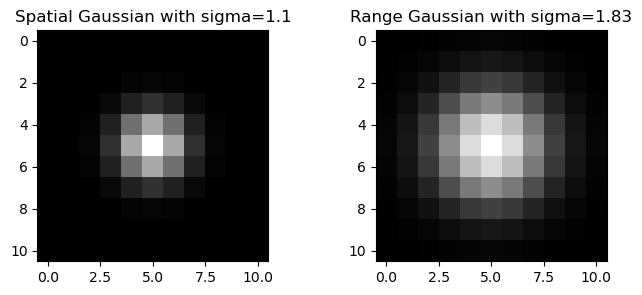

In [33]:

size = k
kernel1 = np.fromfunction(lambda x, y: (1/ (2*np.pi*sigma_d**2)) * np.exp(- ((x - (size-1)/2)**2 + (y - (size-1)/2)**2) / (2*sigma_d**2)), (size, size))
kernel2 = np.fromfunction(lambda x, y: (1/ (2*np.pi*sigma_r**2)) * np.exp(- ((x - (size-1)/2)**2 + (y - (size-1)/2)**2) / (2*sigma_r**2)), (size, size))
kernel3 = np.dot(kernel1,kernel2)

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.imshow(kernel1,cmap='gray')
plt.title('Spatial Gaussian with sigma='+str(np.round(sigma_d,2)))
plt.subplot(1,2,2)
plt.imshow(kernel2,cmap='gray')
plt.title('Range Gaussian with sigma='+str(np.round(sigma_r,2)))
plt.show()


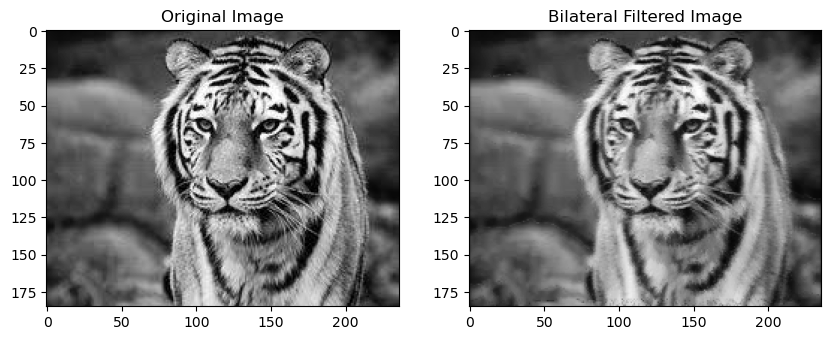

In [34]:
image_ret = np.round(val).astype(np.uint8)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(tiger,cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(image_ret,cmap='gray')
plt.title('Bilateral Filtered Image')
plt.show()


### Difference between Bilateral and gaussian filter
- The gaussian filter performs gaussian blurring according to the kernel over the whole image, thereby reducing high-frequency elements.
- However, while reducing high-frequency elements, it is unable to differentiate between noise and edges in the image, which causes the whole image to be blurred
- Bilateral filtering, however, applys the same gaussian filter only on those places which are close in intensity to the central image pixel in the sliding kernel, thereby omiting the original edges present in the image. 
- Thus the Bilateral filtering reduces noise in the image while preserving the original edges in contrast to the gaussian filtering which just blurs the whole image.
- In conclusion, if we want to remove noise from the image, it is much better to use a biLateral filter with appropiate standard deviations of the 2 gaussians to get the desired de-noised image.

---
## Observing the effect of changing $\sigma_d$ while keeping $\sigma_r , k$ fixed
- $k = 11$ to keep kernel size odd
- $\sigma_r = k/6$ to include 3 standard deviations (99% of all gaussian) 

In [35]:
# effect of sigma on image
image_path = './Images/tiger.jfif'
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
tiger = np.array(gray_image)

# keeping k fixed and varying sigma_d
k = 11
num_sd = [1,2,3,4,5]
sigma_r = (k/2)/3

val = []
index = 0
for i in num_sd:
    sigma_d = (k/2)/i
    val.append(bilaterFilter(tiger,k,sigma_d,sigma_r))
    index = index+1
    print('image ',index,' done')


image  1  done
image  2  done
image  3  done
image  4  done
image  5  done


Varying Standard deviation of Spatial Gaussian Kernel for k= 11  and sigma_r= 1.8333333333333333


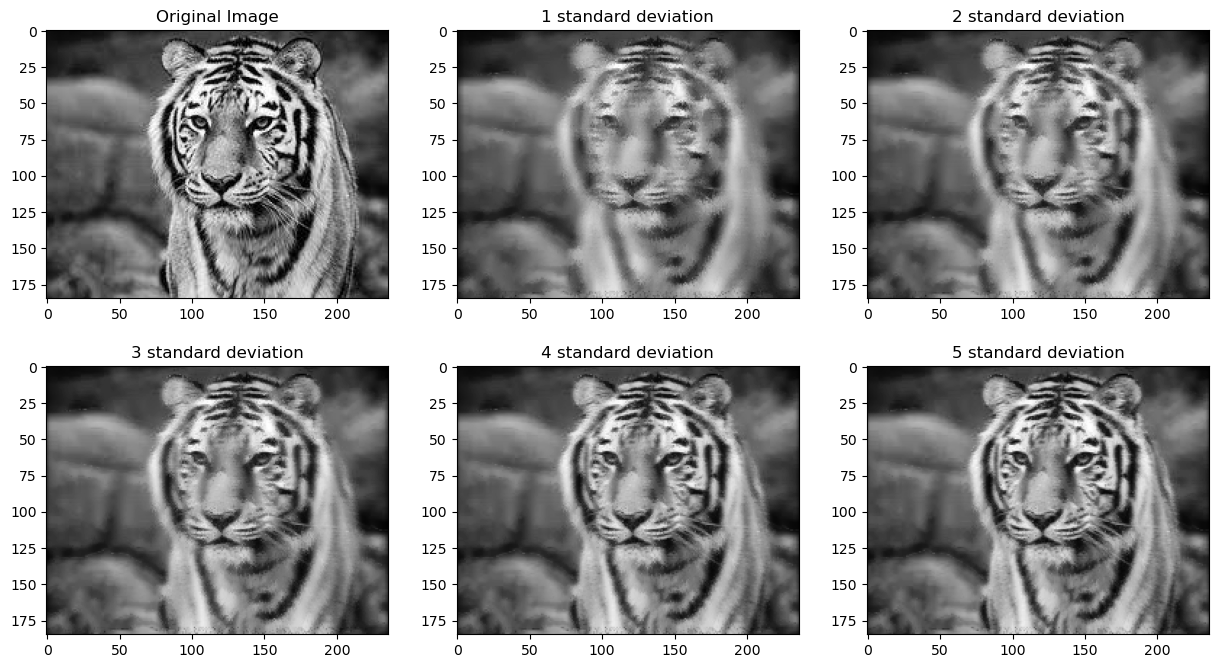

In [36]:

print('Varying Standard deviation of Spatial Gaussian Kernel for k=',k,' and sigma_r=',sigma_r)

plt.figure(figsize=(15,8))

plt.subplot(2,3,1)
plt.imshow(tiger,cmap='gray')
plt.title('Original Image')


plt.subplot(2,3,2)
plt.imshow(np.round(val[0]).astype(np.uint8),cmap='gray')
plt.title('1 standard deviation')

plt.subplot(2,3,3)
plt.imshow(np.round(val[1]).astype(np.uint8),cmap='gray')
plt.title('2 standard deviation')

plt.subplot(2,3,4)
plt.imshow(np.round(val[2]).astype(np.uint8),cmap='gray')
plt.title('3 standard deviation')

plt.subplot(2,3,5)
plt.imshow(np.round(val[3]).astype(np.uint8),cmap='gray')
plt.title('4 standard deviation')

plt.subplot(2,3,6)
plt.imshow(np.round(val[4]).astype(np.uint8),cmap='gray')
plt.title('5 standard deviation')

plt.show()


***Note: 2 Standard Deviation denotes that the $\sigma$ is chosen such that the kernel includes $2\cdot \sigma$ of the total gaussian*** 

---
## Observing the effect of changing $\sigma_r$ while keeping $\sigma_d , k$ fixed
- $k = 11$ to keep kernel size odd
- $\sigma_d = k/6$ to include 3 standard deviations (99% of all gaussian) 

In [37]:
# effect of sigma on image
image_path = './Images/tiger.jfif'
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
tiger = np.array(gray_image)

# keeping k fixed and sigma_d fixed and varying sigma_r
k = 11
num_sd = [1,2,3,4,5]
sigma_d = (k/2)/3

val = []
index = 0
for i in num_sd:
    sigma_r = (k/2)/i
    val.append(bilaterFilter(tiger,k,sigma_d,sigma_r))
    index = index+1
    print('image ',index,' done')


image  1  done
image  2  done
image  3  done
image  4  done
image  5  done


Varying Standard deviation of Range Gaussian Kernel for k= 11  and sigma_d= 1.8333333333333333


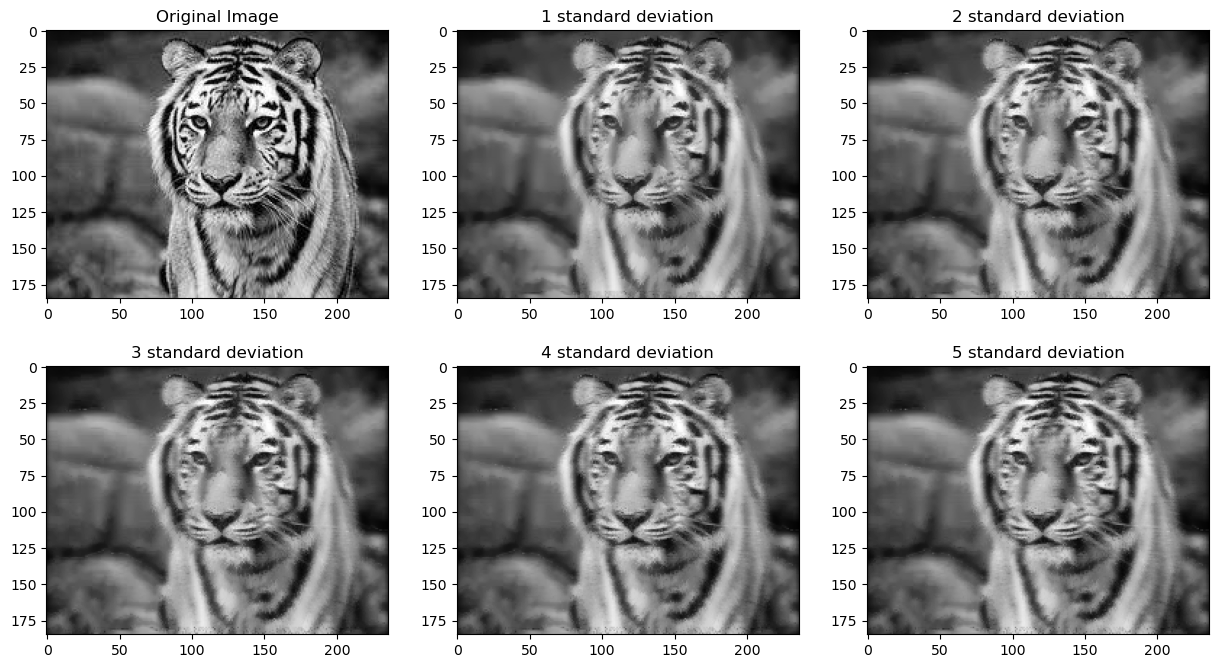

In [38]:

print('Varying Standard deviation of Range Gaussian Kernel for k=',k,' and sigma_d=',sigma_d)

plt.figure(figsize=(15,8))

plt.subplot(2,3,1)
plt.imshow(tiger,cmap='gray')
plt.title('Original Image')


plt.subplot(2,3,2)
plt.imshow(np.round(val[0]).astype(np.uint8),cmap='gray')
plt.title('1 standard deviation')

plt.subplot(2,3,3)
plt.imshow(np.round(val[1]).astype(np.uint8),cmap='gray')
plt.title('2 standard deviation')

plt.subplot(2,3,4)
plt.imshow(np.round(val[2]).astype(np.uint8),cmap='gray')
plt.title('3 standard deviation')

plt.subplot(2,3,5)
plt.imshow(np.round(val[3]).astype(np.uint8),cmap='gray')
plt.title('4 standard deviation')

plt.subplot(2,3,6)
plt.imshow(np.round(val[4]).astype(np.uint8),cmap='gray')
plt.title('5 standard deviation')

plt.show()



***Note: 2 Standard Deviation denotes that the $\sigma$ is chosen such that the kernel includes $2\cdot \sigma$ of the total gaussian*** 

---
## Observing the effect of changing $k$ while keeping $\sigma_d , \sigma_r$ fixed
- $\sigma_d = 2$ (fixed) 
- $\sigma_r = 2$ (fixed)

In [39]:
# effect of kernel size on image
image_path = './Images/tiger.jfif'
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
tiger = np.array(gray_image)

# keeping k fixed and sigma_d fixed and varying sigma_r
sigma_d = 2
sigma_r = 2

val = []
k = []
index = 0
for k_val in range(3,22,4):
    val.append(bilaterFilter(tiger,k_val,sigma_d,sigma_r))
    index = index+1
    k.append(k_val)
    print('image ',index,' done')


image  1  done
image  2  done
image  3  done
image  4  done
image  5  done


Varying Kernel size for sigma_d= 2  and sigma_r= 2


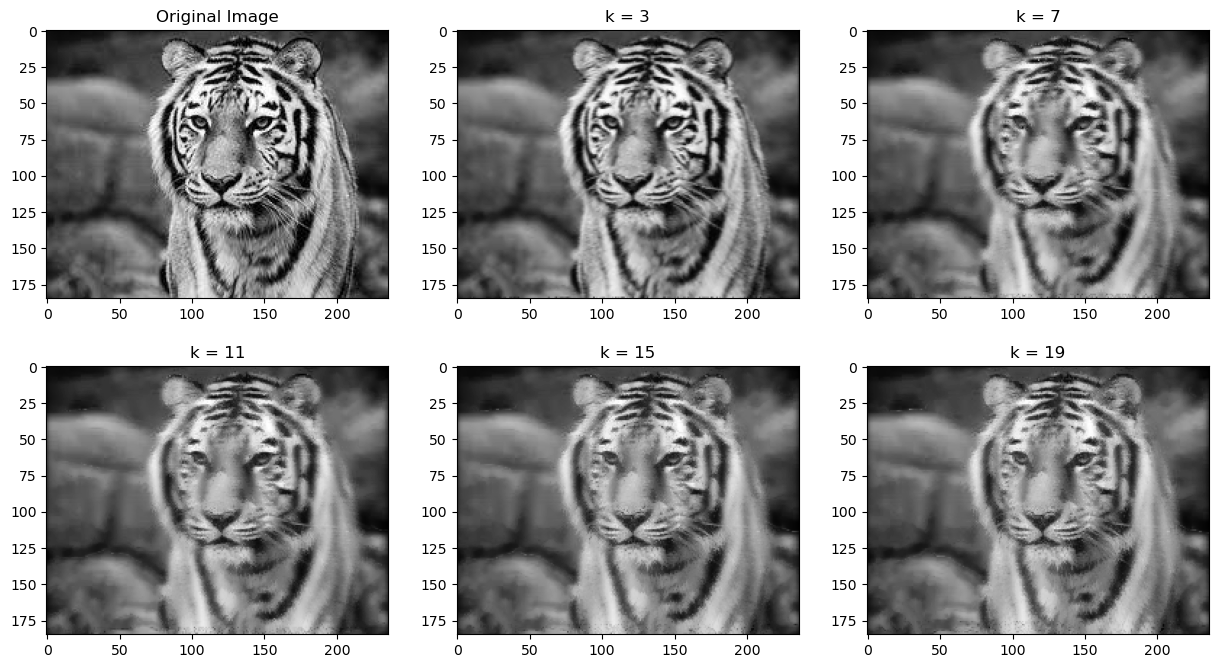

In [40]:

print('Varying Kernel size for sigma_d=',sigma_d,' and sigma_r=',sigma_r)

plt.figure(figsize=(15,8))

plt.subplot(2,3,1)
plt.imshow(tiger,cmap='gray')
plt.title('Original Image')


plt.subplot(2,3,2)
plt.imshow(np.round(val[0]).astype(np.uint8),cmap='gray')
plt.title('k = '+str(k[0]))

plt.subplot(2,3,3)
plt.imshow(np.round(val[1]).astype(np.uint8),cmap='gray')
plt.title('k = '+str(k[1]))

plt.subplot(2,3,4)
plt.imshow(np.round(val[2]).astype(np.uint8),cmap='gray')
plt.title('k = '+str(k[2]))

plt.subplot(2,3,5)
plt.imshow(np.round(val[3]).astype(np.uint8),cmap='gray')
plt.title('k = '+str(k[3]))

plt.subplot(2,3,6)
plt.imshow(np.round(val[4]).astype(np.uint8),cmap='gray')
plt.title('k = '+str(k[4]))

plt.show()

